<a href="https://colab.research.google.com/github/Faabry/Data_Analysis/blob/main/Pandas_An%C3%A1lise_de_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importando uma tabela a partir de um arquivo Excel.**

In [4]:
import pandas as pd

df = pd.read_excel('Vendas.xlsx')
df.head()

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,1,2019-01-01,Iguatemi Esplanada,Sapato Estampa,1,358,358
1,1,2019-01-01,Iguatemi Esplanada,Camiseta,2,180,360
2,1,2019-01-01,Iguatemi Esplanada,Sapato Xadrez,1,368,368
3,2,2019-01-02,Norte Shopping,Relógio,3,200,600
4,2,2019-01-02,Norte Shopping,Chinelo Liso,1,71,71


# **Análise Descritiva**

In [51]:
# Verificando o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93910 entries, 0 to 93909
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Código Venda    93910 non-null  int64         
 1   Data            93910 non-null  datetime64[ns]
 2   ID Loja         93910 non-null  object        
 3   Produto         93910 non-null  object        
 4   Quantidade      93910 non-null  int64         
 5   Valor Unitário  93910 non-null  int64         
 6   Valor Final     93910 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 5.0+ MB


* Todos os dados estão com seus respectivos tipos corretos, seguiremos com a análise normalmente.

# **Análise Diagnóstica**

## **Question 1: Qual foi a loja com o maior faturamento?**


* O primeiro passo é agrupar todas as lojas para que possamos calcular
o faturamento de cada uma de forma individual.

In [6]:
lojas = df.groupby('ID Loja').sum()
lojas

,Código Venda,Quantidade,Valor Unitário,Valor Final
ID Loja,,,,
Bourbon Shopping SP,123249345,8236,736434,1600260
Center Shopping Uberlândia,118172000,7994,715956,1543961
Iguatemi Campinas,124216893,8228,731584,1612460
Iguatemi Esplanada,121435795,8008,729290,1596339
Norte Shopping,128314645,8468,749628,1610477
Novo Shopping Ribeirão Preto,124275928,8234,725159,1578522
Palladium Shopping Curitiba,125200233,8446,738810,1600499
Parque Dom Pedro Shopping,117175394,7789,702186,1509575
Passei das Águas Shopping,119631947,7999,715348,1536925


* Verificando qual foi o maior valor da coluna **["Valor Final"]** do nosso DataFrame.

In [7]:
lojas['Valor Final'].max()
lojas.loc[lojas['Valor Final'] == 1615271]

,Código Venda,Quantidade,Valor Unitário,Valor Final
ID Loja,,,,
Shopping Vila Velha,132298698,8619,746355,1615271


* A loja com o maior faturamento foi **"Shopping Vila Velha"** com o faturamento de R$1.615.271,00.

## **Question 2: Qual foi a loja com o menor faturamento?**

In [8]:
lojas['Valor Final'].min()
lojas.loc[lojas['Valor Final'] == 1468508]

,Código Venda,Quantidade,Valor Unitário,Valor Final
ID Loja,,,,
Shopping Morumbi,116391208,7855,690648,1468508


* A Loja com o menor faturamento foi **"Shopping Morumbi"** com o faturamento de R$1.468.508,00.

## **Question 3: Qual foi a diferença em "R$" entre o maior e o menor faturamento?**

In [9]:
maior_faturamento = 1615271
menor_faturamento = 1468508

dif_faturamento = maior_faturamento - menor_faturamento
print(f'R${float(dif_faturamento):.2f}')

R$146763.00


* Uma diferença não muito absurda de **R$146.763,00** entre o "Maior" e o "Menor" faturamento.

## **Question 4: Qual foi a média de faturamento de todas as lojas?**

In [10]:
lojas['Valor Final'].mean()

1558390.08

* A média de faturamento é R$1.558.390,08.

In [27]:
x = lojas.index
y = lojas["Valor Final"]

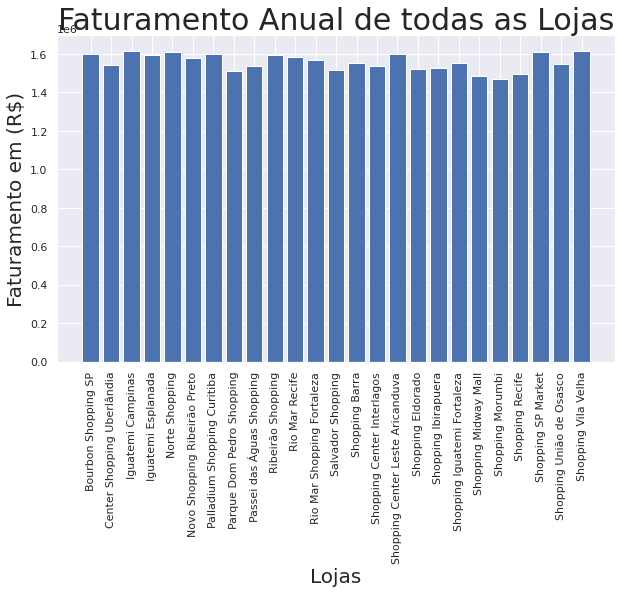

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Faturamento Anual de todas as Lojas", size=30)
plt.bar(x, y)
plt.ylabel("Faturamento em (R$)", size=20)
plt.xlabel("Lojas", size=20)
plt.xticks(rotation=90)
plt.show()

## **Question 5: Qual foi o produto mais vendido?**

* Primeiro precisamos agrupar os produtos para verificar a maior quantidade vendida em uma só transação.

In [31]:
produtos = df.groupby('Produto').sum()
produtos

,Código Venda,Quantidade,Valor Unitário,Valor Final
Produto,,,,
Bermuda,25770079,1692,116100,253800
Bermuda Estampa,24703185,1616,127257,273104
Bermuda Linho,28670449,1893,167115,369135
Bermuda Liso,25053304,1637,120262,257009
Bermuda Listrado,25576302,1675,129259,273025
...,...,...,...,...
Tênis Estampa,25479194,1663,200704,425728
Tênis Linho,25535255,1713,232848,503622
Tênis Liso,26076935,1656,205086,440496


* Agora precisamos saber qual foi a maior quantidade vendida.

In [ ]:
produtos['Quantidade'].max()

1893

* A maior quantidade de vendas de **um unico produto** foi de 1893.

In [ ]:
# Agora precisamos saber qual foi o produto mais vendido
produtos.loc[produtos['Quantidade'] == 1893]

,Código Venda,Quantidade,Valor Unitário,Valor Final
Produto,,,,
Bermuda Linho,28670449,1893,167115,369135


* O produto mais vendido foi a **"bermuda linho"** com 1893 quantidades vendidas.

## **Question 6: Qual foi o produto menos vendido?**

In [ ]:
produtos['Quantidade'].min()

1529

* A menor quantidade de vendas de um unico produto foi 1529.

In [ ]:
# Vamos descobrir qual foi o produto menos vendido
produtos.loc[produtos['Quantidade'] == 1529]

,Código Venda,Quantidade,Valor Unitário,Valor Final
Produto,,,,
Short Listrado,22766343,1529,73134,155958


* O produto menos vendido foi **"short listrado"** com 1529 quantidades vendidas.

## **Question 7: Quais foram os produtos que tiveram o maior e o menor faturamento?**

In [ ]:
produtos['Valor Final'].max()

1215935

* O produto com maior faturamento foi R$1.215.935,00.

In [ ]:
produtos.loc[produtos['Valor Final'] == 1215935]

,Código Venda,Quantidade,Valor Unitário,Valor Final
Produto,,,,
Terno Listrado,24639302,1715,546639,1215935


* O produto com maior faturamento foi **"terno listrado"** faturando R$1.215.935,00.
* Foram 1715 unidades vendidas.

In [48]:
produtos['Valor Final'].min()

51450

In [49]:
produtos.loc[produtos['Valor Final'] == 51450]

,Código Venda,Quantidade,Valor Unitário,Valor Final
Produto,,,,
Meia,26623385,1715,23490,51450


* O produto com menor faturamento foi **"meia"** faturando R$51.450,00.
* Foram 1715 unidades vendidas

In [34]:
x = produtos.index
y = produtos["Valor Final"]

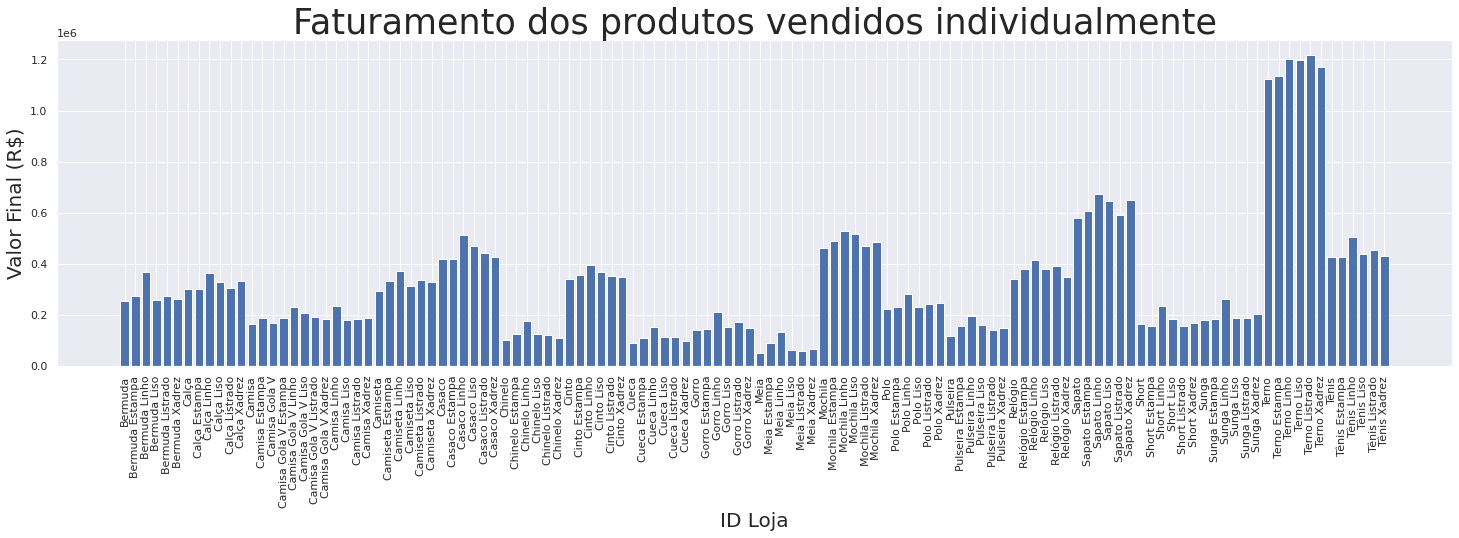

In [47]:
from matplotlib import pyplot as plt

plt.figure(figsize=(25, 6))
plt.title('Faturamento dos produtos vendidos individualmente', size=35)
plt.bar(x, y)
plt.xlabel('ID Loja', size=20)
plt.xticks(rotation=90)
plt.ylabel('Valor Final (R$)', size=20)
plt.show()

## **Conclusão:**
* # Tanto o produto com maior faturamento quanto o produto com menor faturamento foram vendidas exatas **1715 unidades**.

## **Question 8: Qual é o produto mais caro e o mais barato?**

* Primeiro precisamos saber qual foi o maior valor unitário, lembrando que:
* Como estamos usando agrupamento dos produtos o valor retornado sera a soma de todos os valores individuais daquele mesmo produto, será necessário depois descobrir o valor individual daquele produto.

In [50]:
produtos['Valor Unitário'].max()

573120

In [ ]:
produtos.loc[produtos['Valor Unitário'] == 573120]

,Código Venda,Quantidade,Valor Unitário,Valor Final
Produto,,,,
Terno Liso,26118913,1666,573120,1199520


* O produto com o maior valor unitário é "Terno Liso"
* Agora precisamos saber o seu valor individual

In [ ]:
df.loc[df['Produto'] == 'Terno Liso']

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
215,154,2019-01-02,Shopping Eldorado,Terno Liso,1,720,720
246,178,2019-01-02,Shopping Morumbi,Terno Liso,2,720,1440
348,251,2019-01-03,Passei das Águas Shopping,Terno Liso,2,720,1440
606,412,2019-01-04,Shopping Morumbi,Terno Liso,1,720,720
674,454,2019-01-04,Ribeirão Shopping,Terno Liso,1,720,720
...,...,...,...,...,...,...,...
93721,64891,2019-11-30,Shopping SP Market,Terno Liso,1,720,720
93819,64953,2019-11-30,Rio Mar Shopping Fortaleza,Terno Liso,3,720,2160
93827,64960,2019-11-30,Iguatemi Campinas,Terno Liso,1,720,720
93837,64970,2019-11-30,Iguatemi Campinas,Terno Liso,1,720,720


* O valor unitário do produto **"Terno Liso"** é de R$720,00.

* Agora vamos descobrir o qual é o produto mais barato.

In [ ]:
produtos['Valor Unitário'].min()

23490

In [ ]:
produtos.loc[produtos['Valor Unitário'] == 23490]

,Código Venda,Quantidade,Valor Unitário,Valor Final
Produto,,,,
Meia,26623385,1715,23490,51450


* O produto com o menor valor unitário é **"meia"**, vamos descobrir de fato qual é seu valor unitário..

In [ ]:
df.loc[df['Produto'] == 'Meia']

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
27,22,2019-01-02,Parque Dom Pedro Shopping,Meia,1,30,30
808,541,2019-01-04,Shopping Midway Mall,Meia,5,30,150
1094,726,2019-01-05,Shopping Iguatemi Fortaleza,Meia,1,30,30
1599,1059,2019-01-07,Novo Shopping Ribeirão Preto,Meia,4,30,120
1690,1121,2019-01-07,Shopping Barra,Meia,3,30,90
...,...,...,...,...,...,...,...
93424,64673,2019-11-29,Salvador Shopping,Meia,2,30,60
93440,64686,2019-11-29,Passei das Águas Shopping,Meia,3,30,90
93567,64776,2019-11-29,Rio Mar Recife,Meia,3,30,90
93745,64908,2019-11-30,Iguatemi Esplanada,Meia,4,30,120


## **Conclusão:**
* # Além de ser o produto mais barato, o produto **"Meia"** também foi o produto menos vendido.

# **Análise Prescritiva**

* # Como o produto "meia" não é tão vendido assim e tem um valor razoavelmente barato, seria interessante dar esse produto como brinde após um tipo específico de compra e aumentar o valor do produto em questão, por exemplo:

* # Na compra de um Tênis o cliente ganha um par de meias de brinde, o Tênis que antes custava R$400,00 passa a custar RS450,00.